In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import scipy.stats
import random
import math

In [2]:
#importing the data from Google Drive
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSMiM5wTg-lKe--jhh9mhF9oa6-f3BSalVQJTtXYLqQSuV01Hm4L1mzZc3QQDB2MpcBUDVjZqN24Su-/pub?gid=1627641766&single=true&output=csv')

#taking a look at the data
df.head()

,Response Number,Who should be our starting right back,Is Suarez part of our best starting 11?,What is Valverdes biggest weakness,Is Rakitic part of our best starting 11?,Should Valverde stay another season until 2020,After Valverde leaves who should be our next coach?,Realistically what do you see us winning this year?,Comments
0,1,Roberto,Yes,Very little rotations and prefers his starting 11,Yes,Yes,Francisco Javier García Pimienta (Barca B Mana...,"UCL,La Liga,Copa del Rey",NaN
1,2,Roberto,Yes,Too reliant on individual quality,Yes,Yes,Mauricio Pochettino (Spurs Manager),"UCL,La Liga,Copa del Rey",NaN
2,3,Roberto,Yes,Too reliant on Messi,Yes,Yes,Quique Setién (Real Betis Manager),"UCL,La Liga",NaN
3,4,Roberto,Yes,Very little rotations and prefers his starting 11,Yes,Yes,Quique Setién (Real Betis Manager),"UCL,La Liga,Copa del Rey",NaN
4,5,Semedo,Yes,Too reliant on individual quality,No,No,Quique Setién (Real Betis Manager),"La Liga,Copa del Rey",NaN


In [0]:
#renaming columns
df.columns = ['Number', 'rightback', 'suarez', 'weakness', 'rakitic', 'stay', 'nextcoach', 'winning', 'comments']

**Do People Agree with the coach's decision? **

This tests whether people like or agree with the coach. Currently the coach plays Sergi Roberto at rightback, and starts Luis Suarez and Ivan Rakitic. This is a hypothesis test of whether the people polled agree with his decision and if they want him to stay until 2020. In the data, these columns are represented by *rightback*, *suarez*, *rakitic*, and *stay*. 

In [4]:
#converting the 'Yes' or 'No' votes into 1s and 0s with one hot encoding

hot_df = pd.get_dummies(df[['rightback', 'suarez', 'rakitic', 'stay']])

#taking a look at the data
hot_df.head()

,rightback_Roberto,rightback_Semedo,suarez_No,suarez_Yes,rakitic_No,rakitic_Yes,stay_No,stay_Yes
0,1,0,0,1,0,1,0,1
1,1,0,0,1,0,1,0,1
2,1,0,0,1,0,1,0,1
3,1,0,0,1,0,1,0,1
4,0,1,0,1,1,0,1,0


In [0]:
#in the one hot encoding, 1s agree with the coach's decision and want him to stay. 0s are the opposite
#we can find the total agreement by summing up the rows from those who agree completely with the coach (4) to those who disagree (0)

hot_df_sums = hot_df[['rightback_Roberto', 'suarez_Yes', 'rakitic_Yes', 'stay_Yes']].sum(axis=1)


In [6]:
#as seen below, most people agree with most of his decisions [mode of 3, mean of 2.7 with standard dev of 0.9] 

#hot_df_sums.plot.hist(xticks = [0,1,2,3,4])

hot_df_sums.describe()

count    280.000000
mean       2.742857
std        0.914804
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
dtype: float64

##Central Limit Theorem

In [7]:
listofsamples = hot_df_sums.sample(n=40, replace = True).to_frame().mean()
for x in range(10000): 
  df2 = hot_df_sums.sample(n=40, replace = True).to_frame().mean()
  listofsamples = pd.concat([listofsamples, df2])
len(listofsamples)

10001

0    2.742113
dtype: float64

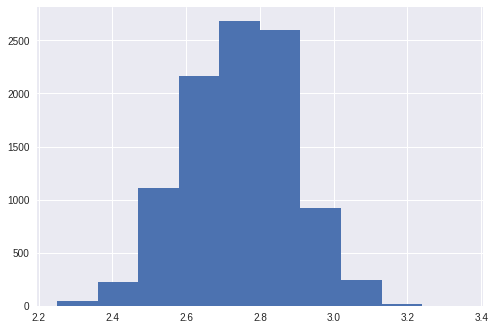

In [8]:
listofsamples.hist()

listofsamples.to_frame().mean()

We can see that the mean of the distribution of sample averages (2.742113) is almost the same population mean (2.742857) which is the central limit theorem. 

##Confidence Intervals

In [13]:
random.seed(1234) #setting seed for reproducibility

means1 = []
means2 = []

index = 1
for x in range(50): 
  
  asample = hot_df_sums.sample(n=40) #random sample of size 40 
  mean = asample.mean() #mean of sample
  std = asample.std()/math.sqrt(len(asample)) *2 #standard dev of sample. The *2 is for obtaining the 95% confidence interval 2 sd from the mean
  
  if mean+std >= 2.742857 and mean-std <= 2.742857: #if the confidence interval contains the population mean (2.742857)
    means1.append(int(index))
    means1.append(mean)
    means1.append(std)
  else: 
    means2.append(int(index))
    means2.append(mean)
    means2.append(std)
  index += 1
  
print(means1)
print(means2)

[1, 2.8, 0.2501281722719425, 2, 2.9, 0.2660248687044706, 3, 2.6, 0.3105000103224738, 4, 2.725, 0.295153154506918, 5, 2.775, 0.29946533552230575, 6, 2.775, 0.29077703150572615, 7, 2.8, 0.2698527613727768, 8, 2.8, 0.26017745423519634, 9, 2.9, 0.2935197542821372, 10, 2.775, 0.28182100156495954, 11, 2.675, 0.2809096944041918, 12, 2.725, 0.32015621187164245, 13, 2.825, 0.2854371366419566, 14, 2.775, 0.28182100156495954, 15, 2.9, 0.24599353754279915, 16, 2.575, 0.2854371366419566, 17, 2.775, 0.24271435147155265, 18, 2.45, 0.29482719841133526, 19, 2.875, 0.29688554299767717, 20, 2.575, 0.3272848676846893, 21, 2.65, 0.32462996686167983, 22, 2.625, 0.27444582857189287, 23, 2.75, 0.30170455917277916, 24, 2.75, 0.30170455917277916, 26, 2.7, 0.27919297618084515, 27, 2.775, 0.2907770315057261, 28, 2.55, 0.3355057414771058, 29, 2.75, 0.31008683647302115, 30, 2.825, 0.27630807777941246, 31, 2.75, 0.2655425022718972, 32, 2.75, 0.2930826434598881, 33, 2.475, 0.3201562118716425, 34, 2.825, 0.26686691199

<br> Converting the lists into dataframes and concatenating them

In [14]:
meansdf1 = pd.DataFrame(np.array(means1).reshape(-1,3), columns = ['index1', 'mean1', 'sd1'])
meansdf2 = pd.DataFrame(np.array(means2).reshape(-1,3), columns = ['index2', 'mean2', 'sd2'])
bigmeans = pd.concat([meansdf1, meansdf2], axis = 1)

bigmeans.head()

,index1,mean1,sd1,index2,mean2,sd2
0,1.0,2.800,0.250128,25.0,2.975,0.208628
1,2.0,2.900,0.266025,47.0,2.450,0.285998
2,3.0,2.600,0.310500,NaN,NaN,NaN
3,4.0,2.725,0.295153,NaN,NaN,NaN
4,5.0,2.775,0.299465,NaN,NaN,NaN


<br> Plotting the means with error bars of 2*standard deviation to obtain the 95% confidence interval

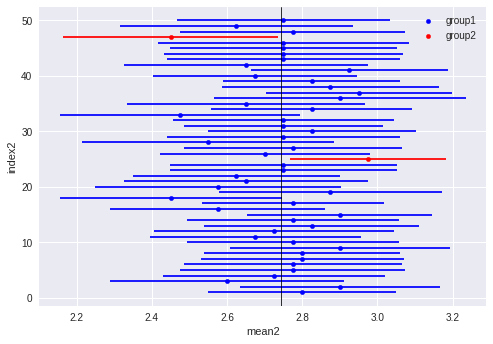

In [15]:
ax = bigmeans.plot(kind = 'scatter', x = 'mean1', y = 'index1', xerr = 'sd1', color = 'blue', label = 'group1')
bigmeans.plot(kind = 'scatter', x = 'mean2', y = 'index2', xerr = 'sd2', color = 'red', label = 'group2', ax=ax)
plt.axvline(2.742857, color = 'black', linewidth = 0.8) #actual population mean

In [16]:
a = len(means1)/3 #divided by 3 because 3 variables (index, mean, and sd are appended at once)
b = len(means2)/3
a/(a+b) * 100 #about 95% of the confidence intervals contain the population parameter (black line)

96.0